This notebook produces the plots for the Supplementary Material of the photon noise paper.

In [1]:
import pandas as pd
from kid_readout.analysis import archive, dataframe, plot_dataframe

updated file list


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
compressor = archive.load_archive('/data/readout/archive/2015-07-06_compressor.npy')
# Use the data taken at the same temperature to correct for TLS noise.
compressor120mK = compressor[np.abs(compressor.sweep_primary_package_temperature - 0.120) < 0.005]
compressor120mK.shape
off = compressor120mK.sort('sweep_epoch').iloc[int(compressor120mK.shape[0] / 2):]

In [3]:
bb = pd.DataFrame(np.load('broadband.npy'))
cw = pd.DataFrame(np.load('continuous-wave.npy'))

In [4]:
def common(df, key):
    s = set(df[key])
    if len(s) > 1:
        raise ValueError("Multiple values for {}".format(key))
    else:
        return s.pop()

In [5]:
single_channel = common(bb, 'channel')

In [6]:
row = off[off.channel==single_channel].iloc[0]

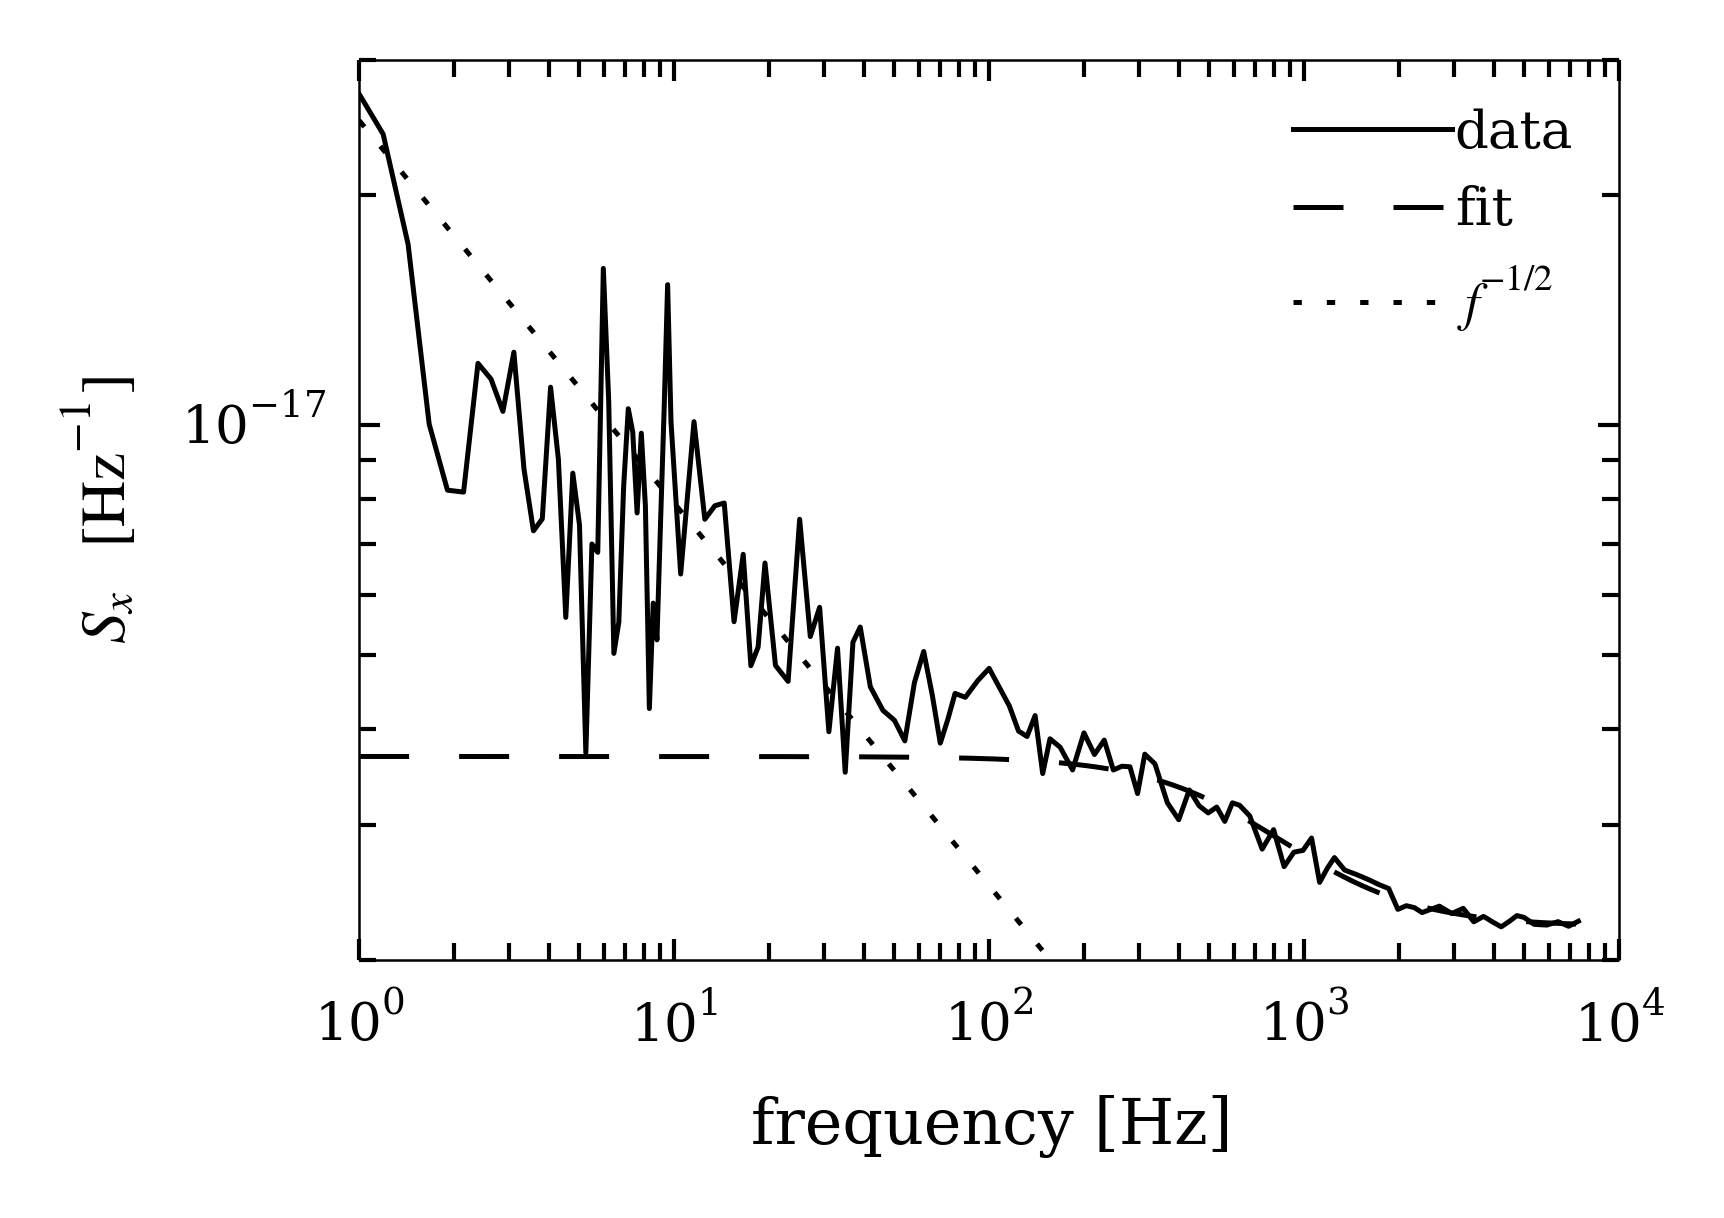

In [8]:
ff = np.logspace(0, 4, 1e3)
#f = np.logspace(np.log10(row.pca_freq.min()), np.log10(row.pca_freq.max()), 1e3)
fig, ax = plt.subplots()

ax.loglog(row.pca_freq, row.pca_eigvals[1], '-k', label='data')
ax.loglog(ff, row.noise_fit_device_noise / (1 + (ff / row.noise_fit_fc)**2) + row.noise_fit_amplifier_noise,
          '--k', label='fit')
ax.loglog(ff, 2.5e-17 * ff**(-1/2), ':k', label='$f^{-1/2}$')

ax.set_ylabel('$S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_xlabel('frequency [Hz]')
ax.set_xlim(1e0, 1e4)
ax.set_ylim(2e-18, 3e-17)
#handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right')

fig.savefig('dark_noise.pdf')
fig.savefig('dark_noise.eps')